# Support Vector Machine

Support Vector Machines (SVM) is a `supervised machine learning algorithm` which can be used for both classification or regression challenges.

However, it is mostly used in classification problems.  

In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you
have) with the value of each feature being the value of a particular coordinate. Then, we perform
classification by finding the hyper-plane that differentiate the two classes very well (look at the below
snapshot).

Types of SVM Kernals:
1. Linear Kernal
2. Polynomial Kernal
3. Radial Basis Fuction Kernal (RBF)



In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ml libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC


In [26]:
# import the data 
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [27]:
# split the data into features and labels

X = df.drop('species', axis=1)
y = df['species']

In [28]:
# test train split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [29]:
# call the model
model = SVC()

In [30]:
# train the model
model.fit(X_train, y_train)

SVC()

In [31]:
# predict the model
y_pred = model.predict(X_test)

In [32]:
# evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 5  0  0]
 [ 0 16  0]
 [ 0  0  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       1.00      1.00      1.00        16
   virginica       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



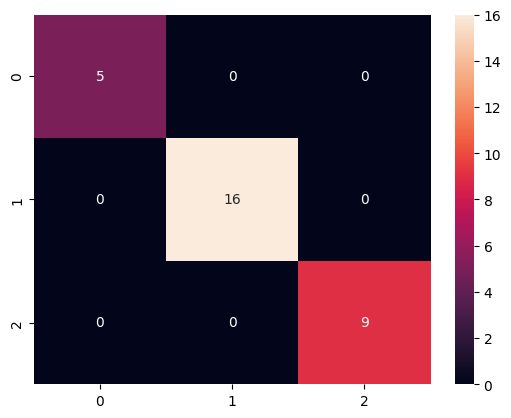

In [33]:
# drawing the confussion matrix using heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()


---
# Support Vector Regressor

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ml libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR

In [35]:
# import dataset from sns
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [36]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [37]:
# preprocessing the data
le = LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object' or df[i].dtype == 'category':
        df[i] = le.fit_transform(df[i])

In [38]:
# split the data into features and labels
X = df.drop('tip', axis=1)
y = df['tip']

In [39]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# call the model
model = SVR()

# train the model
model.fit(X_train, y_train)

# predict the model
y_pred = model.predict(X_test)

In [42]:
# evaluate the model
print('MSE: ',mean_squared_error(y_test, y_pred))
print("R2: ",r2_score(y_test, y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))

MSE:  0.538321847289585
R2:  0.5693326496439823
RMSE:  0.7337041960419641


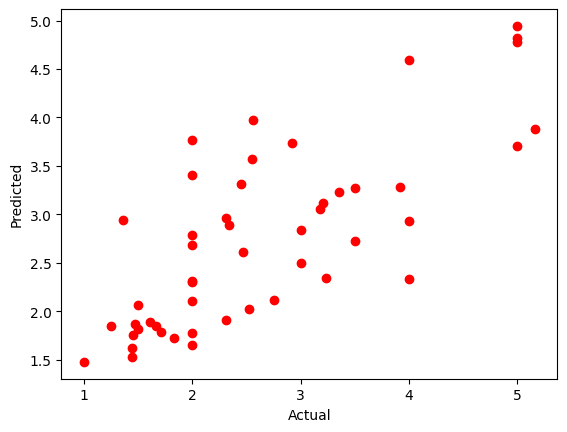

In [47]:
# drawing the scatter plot
plt.scatter(y_test, y_pred, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()